In [16]:
# Exercise 1 - Solution
import torch

 #Create weight and bias
weight = 0.3
bias = 0.9

# Create range values
start = 0
end = 1
step = 0.01

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will happen later on (shapes within linear layers)
y = weight * X + bias
X[:10], y[:10]

# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)




(80, 80, 20, 20)

In [17]:
import matplotlib.pyplot as plt

def plot_predictions(X_train, y_train, X_test, y_test):
    plt.figure(figsize=(6, 4))
    plt.scatter(X_train, y_train, label="Training Data", color='b')
    plt.scatter(X_test, y_test, label="Testing Data", color='r')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title("Training and Testing Data")
    plt.legend()
    plt.show()


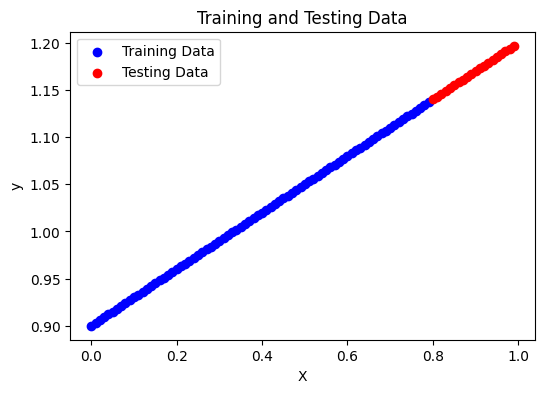

In [18]:
plot_predictions(X_train, y_train, X_test, y_test)

In [19]:
# Exercise 2 - Solution

import torch
from torch import nn

# Define the model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        # Initialize weight and bias as trainable parameters
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True))  # Random weight
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True))  # Random bias

    def forward(self, x):
        return self.weight * x + self.bias  # Linear equation

# Create an instance of the model
model = LinearRegressionModel()

# Check the model parameters (state_dict)
print("Model state_dict:", model.state_dict())


Model state_dict: OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])


Epoch 0 | Training Loss: 0.7567 | Test Loss: 0.7248
Epoch 20 | Training Loss: 0.5255 | Test Loss: 0.4541
Epoch 40 | Training Loss: 0.2943 | Test Loss: 0.1834
Epoch 60 | Training Loss: 0.0766 | Test Loss: 0.0727
Epoch 80 | Training Loss: 0.0526 | Test Loss: 0.1158
Epoch 100 | Training Loss: 0.0455 | Test Loss: 0.1047
Epoch 120 | Training Loss: 0.0387 | Test Loss: 0.0894
Epoch 140 | Training Loss: 0.0318 | Test Loss: 0.0741
Epoch 160 | Training Loss: 0.0250 | Test Loss: 0.0581
Epoch 180 | Training Loss: 0.0181 | Test Loss: 0.0421
Epoch 200 | Training Loss: 0.0113 | Test Loss: 0.0258
Epoch 220 | Training Loss: 0.0044 | Test Loss: 0.0095
Epoch 240 | Training Loss: 0.0037 | Test Loss: 0.0065
Epoch 260 | Training Loss: 0.0037 | Test Loss: 0.0065
Epoch 280 | Training Loss: 0.0037 | Test Loss: 0.0065


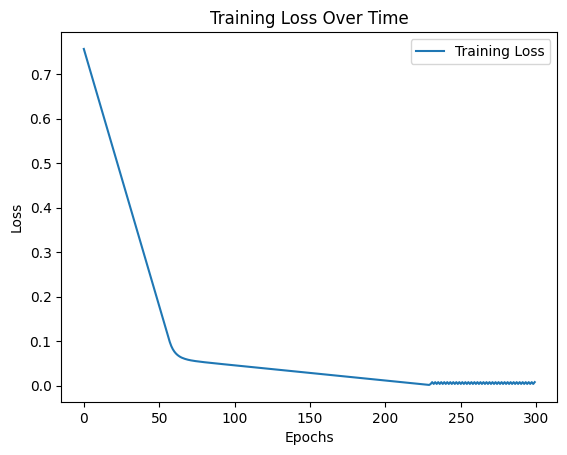

In [20]:
# Exercise 3 - Solution

# Define loss function (L1 Loss)
loss_fn = nn.L1Loss()

# Define optimizer (Stochastic Gradient Descent with learning rate 0.01)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training loop
epochs = 300
loss_history = []

for epoch in range(epochs):
    model.train()  # Set model to training mode

    # Forward pass
    y_pred = model(X_train)

    # Compute loss
    loss = loss_fn(y_pred, y_train)
    loss_history.append(loss.item())

    # Backward pass
    optimizer.zero_grad()  # Zero gradients
    loss.backward()  # Compute gradients
    optimizer.step()  # Update model parameters

    # Test every 20 epochs
    if epoch % 20 == 0:
        model.eval()  # Set model to evaluation mode
        with torch.no_grad():
            y_test_pred = model(X_test)
            test_loss = loss_fn(y_test_pred, y_test)
        print(f"Epoch {epoch} | Training Loss: {loss.item():.4f} | Test Loss: {test_loss:.4f}")

# Plot loss over epochs
plt.plot(loss_history, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Time")
plt.legend()
plt.show()


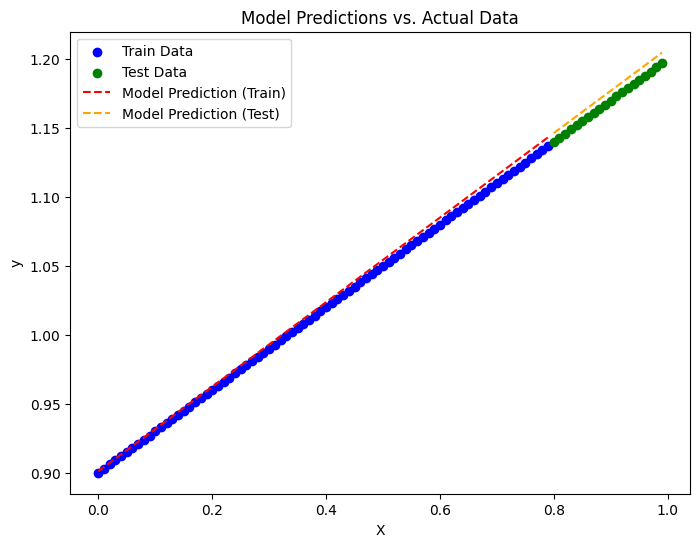

In [22]:
# Exercise 4 - Solution
# Set model to evaluation mode
model.eval()

# Make predictions on training and test data
with torch.no_grad():
    y_train_pred = model(X_train)
    y_test_pred = model(X_test)

# Define function to plot
def plot_predictions(X_train, y_train, X_test, y_test, y_train_pred, y_test_pred):
    plt.figure(figsize=(8, 6))

    # Plot actual training data
    plt.scatter(X_train, y_train, label="Train Data", color="blue")

    # Plot actual test data
    plt.scatter(X_test, y_test, label="Test Data", color="green")

    # Plot model predictions (train and test)
    plt.plot(X_train, y_train_pred, label="Model Prediction (Train)", color="red", linestyle="dashed")
    plt.plot(X_test, y_test_pred, label="Model Prediction (Test)", color="orange", linestyle="dashed")

    # Labels and title
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title("Model Predictions vs. Actual Data")
    plt.legend()
    plt.show()

# Call function to plot
plot_predictions(X_train, y_train, X_test, y_test, y_train_pred, y_test_pred)


In [23]:
# Exercise 5 - Solution

# Save the trained model state_dict
MODEL_PATH = "linear_regression_model.pth"
torch.save(model.state_dict(), MODEL_PATH)

# Create a new instance of the model (same architecture)
loaded_model = LinearRegressionModel()  # Assuming the class is defined as before

# Load the saved state_dict into the new model instance
loaded_model.load_state_dict(torch.load(MODEL_PATH))

# Set model to evaluation mode
loaded_model.eval()

# Make predictions with the loaded model
with torch.no_grad():
    y_test_pred_loaded = loaded_model(X_test)

# Compare the predictions from the original and loaded model
print("Predictions match:", torch.allclose(y_test_pred, y_test_pred_loaded, atol=1e-6))


Predictions match: True


<ipython-input-23-46a079aecaff>:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(MODEL_PATH))
